In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
import os
from torchvision import datasets, transforms

In [3]:
# Define the transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
# Download the data sets and load them to Dataloader,
# which combines the data-set and a sampler and provides single- or multi-process iterators over the data-set
# batch size is the number of images we want to read in one go
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)

valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [5]:
# Check the shape of the images and the labels
# return an iterator
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

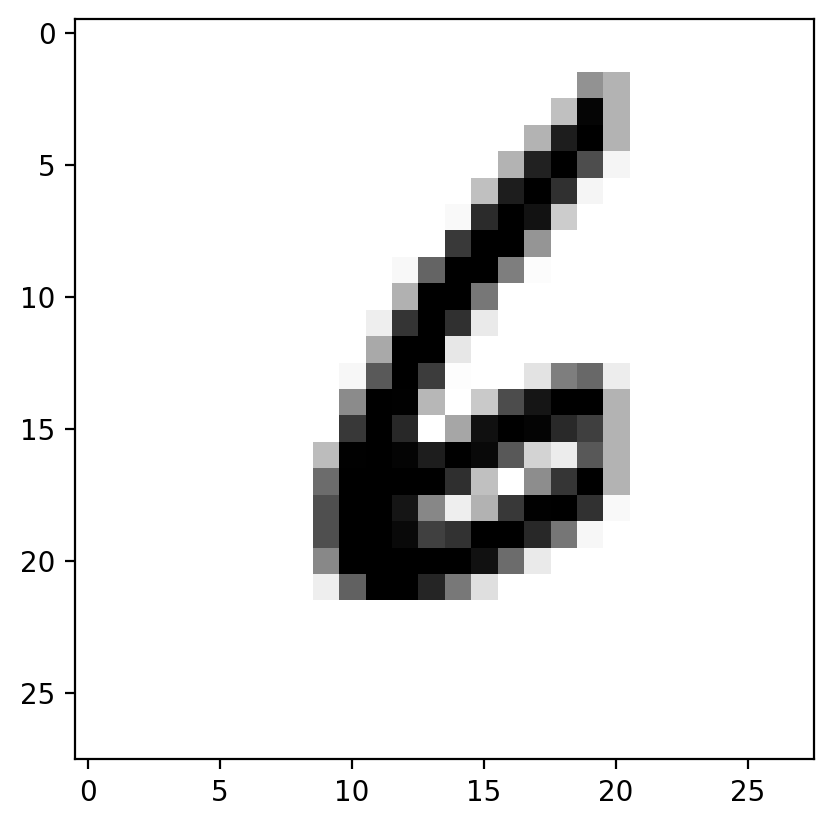

In [7]:
# display one image from the training set
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

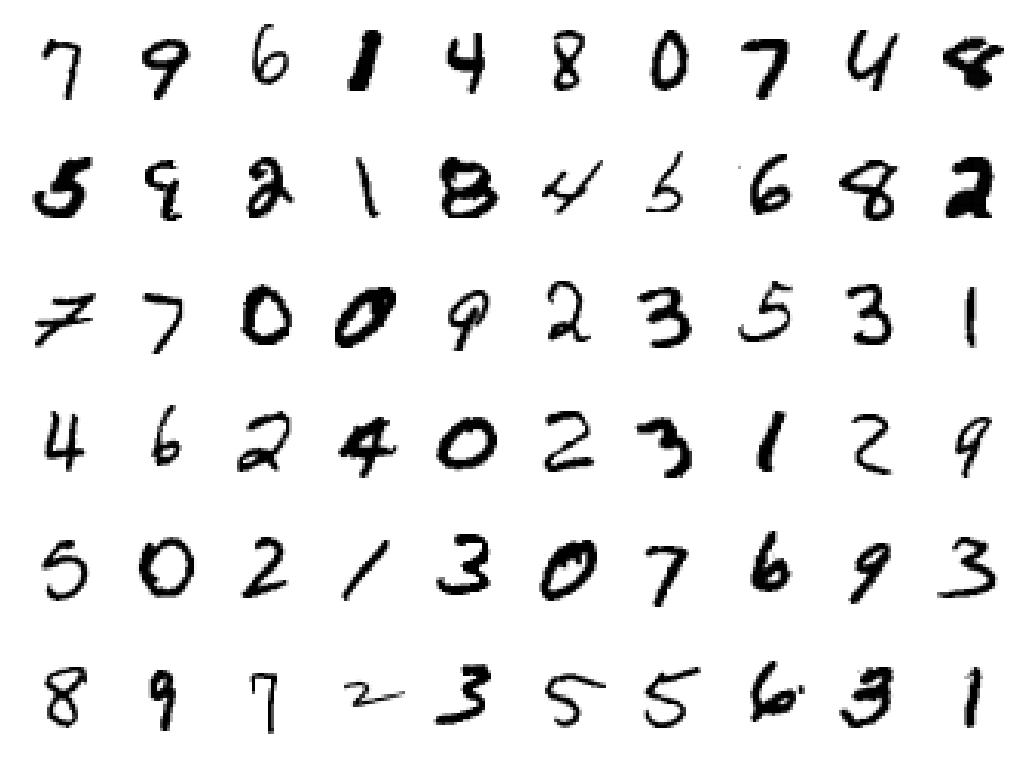

In [8]:
# display more images
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
# Build the neural networks
# 784 = 28*28 input layer
# 128 Relu hidden layer1
# 64 Relu hidden layer2
# 10 softmax output layer
# cross-entropy loss layer

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [10]:
# increase the number of neurons in hidden layers
large_hidden_sizes = [256, 128]
model_2 = nn.Sequential(nn.Linear(input_size, large_hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(large_hidden_sizes[0], large_hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(large_hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model_2)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [14]:
# define the negative log-likelihood loss. 
# It is useful to train a classification problem with C classes. 
# Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss layer
criterion = nn.NLLLoss()
# get the first iteration
images, labels = next(iter(trainloader))
# flatten image to 64*784
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [15]:
# Adjusting weights
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 tensor([[ 8.5940e-04,  8.5940e-04,  8.5940e-04,  ...,  8.5940e-04,
          8.5940e-04,  8.5940e-04],
        [-5.5502e-04, -5.5502e-04, -5.5502e-04,  ..., -5.5502e-04,
         -5.5502e-04, -5.5502e-04],
        [ 3.2205e-05,  3.2205e-05,  3.2205e-05,  ...,  3.2205e-05,
          3.2205e-05,  3.2205e-05],
        ...,
        [-1.2969e-04, -1.2969e-04, -1.2969e-04,  ..., -1.2969e-04,
         -1.2969e-04, -1.2969e-04],
        [ 5.1905e-04,  5.1905e-04,  5.1905e-04,  ...,  5.1905e-04,
          5.1905e-04,  5.1905e-04],
        [-7.6867e-04, -7.6867e-04, -7.6867e-04,  ..., -7.6867e-04,
         -7.6867e-04, -7.6867e-04]])
After backward pass: 
 tensor([[ 2.6601e-03,  2.6601e-03,  2.6601e-03,  ...,  2.6601e-03,
          2.6601e-03,  2.6601e-03],
        [-5.3118e-03, -5.3118e-03, -5.3118e-03,  ..., -5.3118e-03,
         -5.3118e-03, -5.3118e-03],
        [-2.3100e-05, -2.3100e-05, -2.3100e-05,  ..., -2.3100e-05,
         -2.3100e-05, -2.3100e-05],
        ...,

In [16]:
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


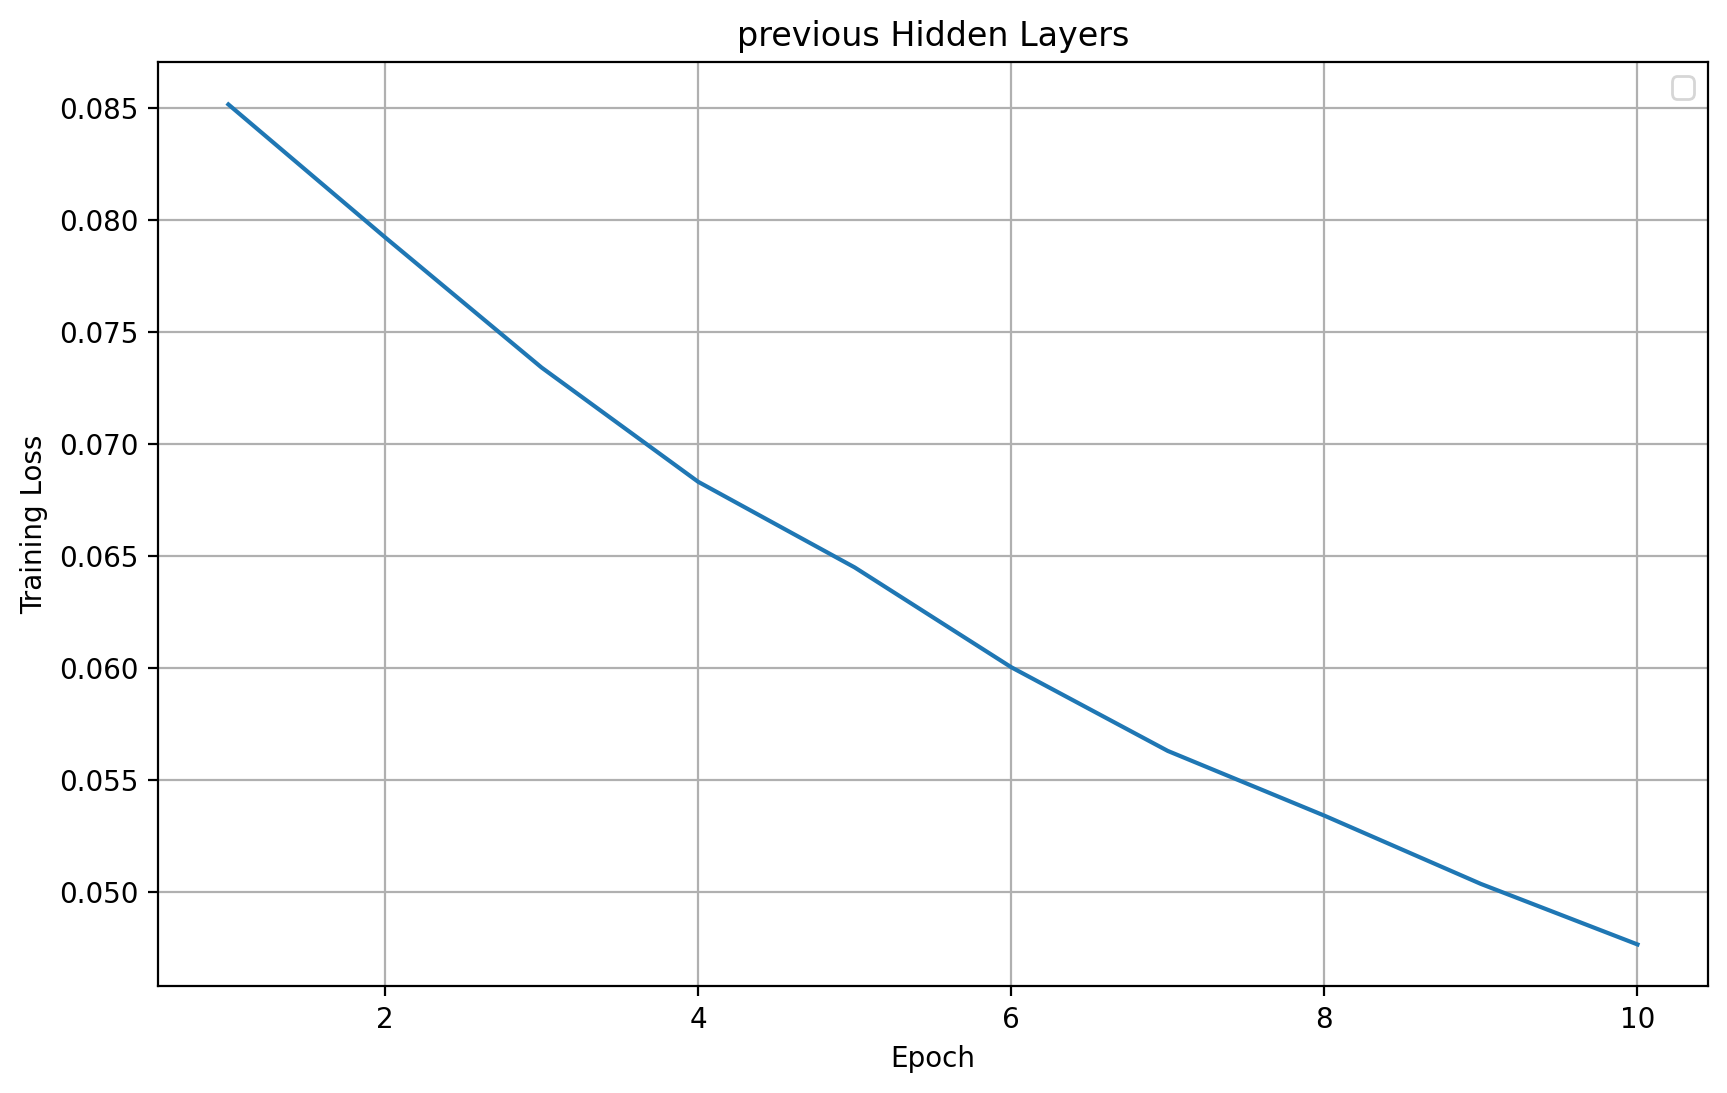

In [19]:
# Training neural network process
time0 = time()
epochs = 10

training_losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # Take an update step and few the new weights
        optimizer.step()
        
        running_loss += loss.item()
        
    training_losses.append(running_loss / len(trainloader))
    
#     else:
#         print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
# print("\nTraining Time (in minutes) =",(time()-time0)/60)

training_time = (time() - time0) / 60

# Plot the training loss for the specified number of hidden layers
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, epochs + 1), training_losses)

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('previous Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


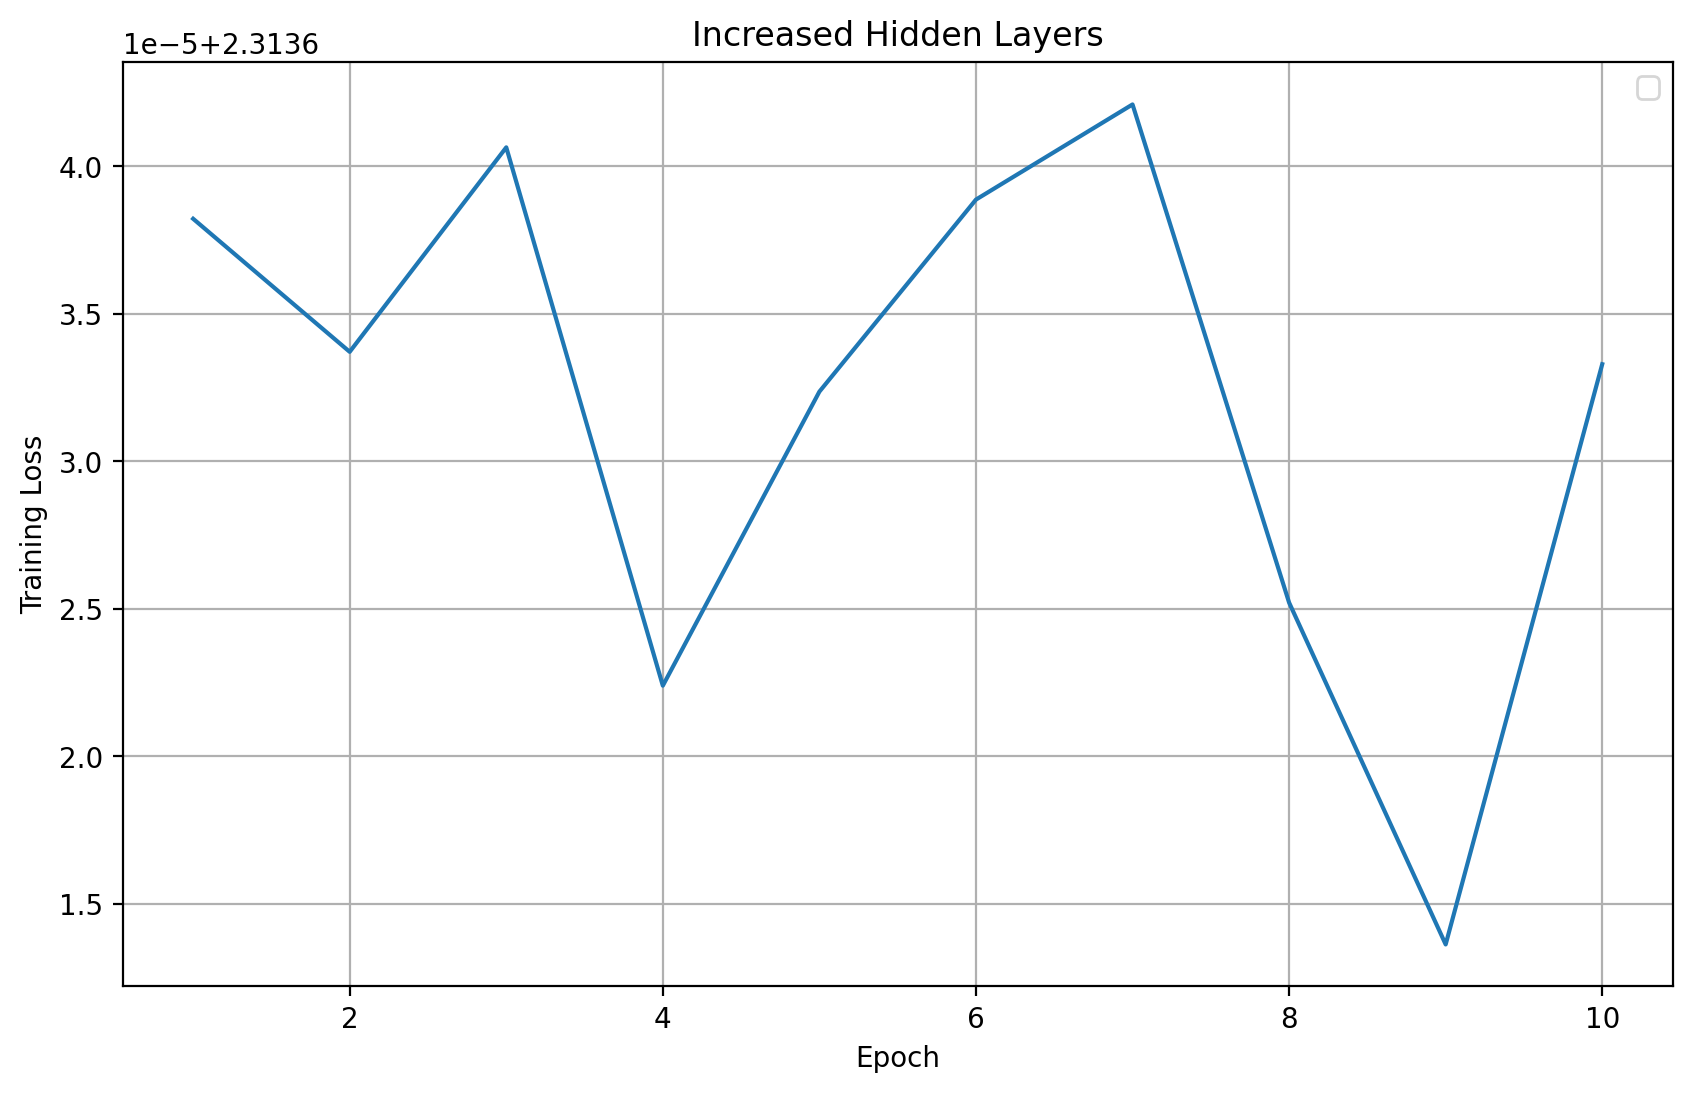

In [20]:
# Traning nn with larger number of neurons in hidden layers
time0 = time()
epochs = 10
training_losses = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        output = model_2(images)
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # Take an update step and few the new weights
        optimizer.step()
        
        running_loss += loss.item()
        
    training_losses.append(running_loss / len(trainloader))

#     else:
#         print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
# print("\nTraining Time (in minutes) =",(time()-time0)/60)
training_time = (time() - time0) / 60

# Plot the training loss for the specified number of hidden layers
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, epochs + 1), training_losses)

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Increased Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# comparison between original weight and updated weight
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-3.7659e-02,  2.2444e-02, -3.0945e-02,  ..., -3.4611e-02,
         -3.1595e-02, -2.2925e-02],
        [-2.5788e-02,  6.3587e-03,  1.8010e-02,  ...,  5.4531e-03,
          5.8346e-03,  1.3777e-02],
        [-2.7926e-02, -2.7420e-02,  3.6990e-02,  ...,  2.9530e-02,
          1.7185e-02,  2.7172e-02],
        ...,
        [-4.2202e-02, -2.1319e-02, -8.0066e-03,  ...,  1.2353e-02,
         -3.7659e-02,  4.6818e-03],
        [-1.8218e-02, -5.9807e-05, -1.6015e-02,  ...,  1.0330e-02,
         -1.0903e-02,  3.8881e-02],
        [ 8.9302e-04, -1.5441e-02,  2.3756e-02,  ..., -3.2739e-02,
          3.5010e-02, -2.3854e-02]], requires_grad=True)
Gradient - tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0083, -0.0083, -0.0083,  ..., -0.0083, -0.0083, -0.0083],
        ...,
        [-0.0094, -0.0094, -0.0094,  ..., -0.0094, -0.0094, -0.0094],
   

In [19]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 9


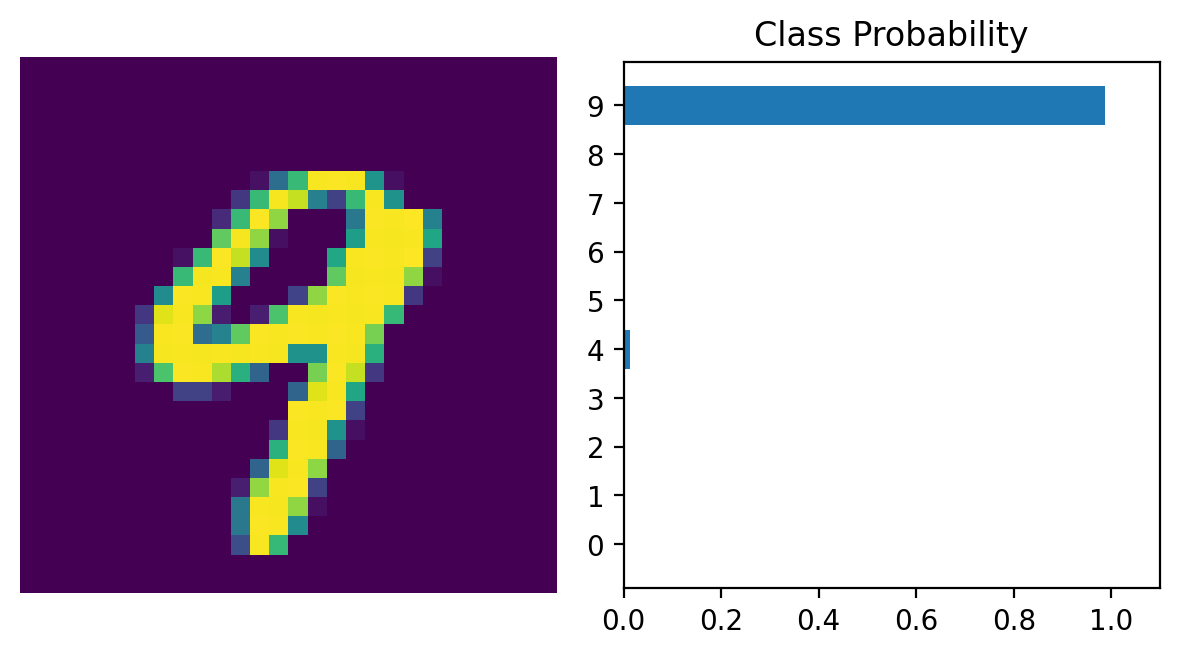

In [20]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [22]:
# calculate model accuracy
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        # Turn off gradients to speed up this part
        with torch.no_grad():
            logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 157

Model Accuracy = 0.9745222929936306
